#### Pridicting Flight Delay By using Advance Machine Learning Algorithms.

**About Dataset**

The dataset contains the following features:
There are 22 columns for the dataset and corresponding column description are given below.  
    
1. Day of Month
2. Day of Week starting from Monday
3. Unique Carrier Code. 
4. An identification number assigned by US DOT to identify a unique airline (carrier). 
5. Code assigned by IATA and commonly used to identify a carrier. 
6. Tail Number
7. Flight Number
8. Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.
9. Origin Airport, Airport Sequence ID. 
10. Origin Airport
11. Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.
12. Destination Airport, Airport Sequence ID. 
13. Destination Airport.
14. Actual Departure Time (local time: hhmm)
15. Departure Delay Indicator, 15 Minutes or More (1=Yes, 0=No)
16. Departure Time Block, Hourly Intervals
17. Actual Arrival Time (local time: hhmm)
18. Arrival Delay Indicator, 15 Minutes or More (1=Yes, 0=No)
19. Cancelled Flight Indicator (1=Yes, 0=No)
20. Diverted Flight Indicator (1=Yes, 0=No)
21. Distance between airports (miles)  
22. Unnamed: 21 - no description available  

**Expected Outcome from the project**

1. Data Preprocessing. 
2. EDA and Feature Engineering
3. Statistical analysis of the data
4. Building and Training the Model
5. Evaluation Metics
6. Hyperparameter tuning
7. Results and Metrics

#### To download the dataset<a href="https://drive.google.com/drive/folders/1TLVlANW6cegman_WNTnXL9dRHRAdl8IU?usp=sharing" title="Google Drive"> Click here </a>

# Import necessary Libraries 

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

# Load Data

In [2]:
df1=pd.read_csv('Jan_2019_ontime.csv')
df1.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [3]:
df1.shape

(583985, 22)

In [4]:
df2=pd.read_csv('Jan_2020_ontime.csv')
df2.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [5]:
df2.shape

(607346, 22)

In [6]:
df=pd.concat([df1,df2])
df=df.reset_index(drop=True)

In [7]:
df.shape

(1191331, 22)

# Handling missing values 

In [8]:
df.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')

In [9]:
# Drop unnecessary columns
df.drop(columns=['Unnamed: 21', 'TAIL_NUM','OP_CARRIER_FL_NUM'], inplace=True)

In [10]:
df.shape

(1191331, 19)

In [11]:
df.isnull().sum()

DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
OP_CARRIER_AIRLINE_ID        0
OP_CARRIER                   0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN                       0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST                         0
DEP_TIME                 23016
DEP_DEL15                23054
DEP_TIME_BLK                 0
ARR_TIME                 24136
ARR_DEL15                26100
CANCELLED                    0
DIVERTED                     0
DISTANCE                     0
dtype: int64

In [12]:
df.ARR_DEL15.isnull().sum()/df.shape[0]*100

2.1908268986536905

In [13]:
# I can drop null value rows,since it is only 2% of data which have null values 
df.dropna(inplace=True)
df.shape

(1165231, 19)

In [14]:
df.isnull().sum()

DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_UNIQUE_CARRIER        0
OP_CARRIER_AIRLINE_ID    0
OP_CARRIER               0
ORIGIN_AIRPORT_ID        0
ORIGIN_AIRPORT_SEQ_ID    0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST_AIRPORT_SEQ_ID      0
DEST                     0
DEP_TIME                 0
DEP_DEL15                0
DEP_TIME_BLK             0
ARR_TIME                 0
ARR_DEL15                0
CANCELLED                0
DIVERTED                 0
DISTANCE                 0
dtype: int64

# EDA and Feature Engineering

In [15]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,2,9E,20363,9E,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,2,9E,20363,9E,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,2,9E,20363,9E,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,2,9E,20363,9E,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165231 entries, 0 to 1191330
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DAY_OF_MONTH           1165231 non-null  int64  
 1   DAY_OF_WEEK            1165231 non-null  int64  
 2   OP_UNIQUE_CARRIER      1165231 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  1165231 non-null  int64  
 4   OP_CARRIER             1165231 non-null  object 
 5   ORIGIN_AIRPORT_ID      1165231 non-null  int64  
 6   ORIGIN_AIRPORT_SEQ_ID  1165231 non-null  int64  
 7   ORIGIN                 1165231 non-null  object 
 8   DEST_AIRPORT_ID        1165231 non-null  int64  
 9   DEST_AIRPORT_SEQ_ID    1165231 non-null  int64  
 10  DEST                   1165231 non-null  object 
 11  DEP_TIME               1165231 non-null  float64
 12  DEP_DEL15              1165231 non-null  float64
 13  DEP_TIME_BLK           1165231 non-null  object 
 14  ARR_TIME          

In [17]:
categorical_col=['OP_UNIQUE_CARRIER','OP_CARRIER_AIRLINE_ID','OP_CARRIER','ORIGIN_AIRPORT_ID',
                 'ORIGIN_AIRPORT_SEQ_ID','ORIGIN','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID','DEST','DEP_TIME_BLK']

In [18]:
for col in categorical_col:
    print('Categorical column : ',col)
    print('No of unique values: ',len(df[col].unique()))

Categorical column :  OP_UNIQUE_CARRIER
No of unique values:  17
Categorical column :  OP_CARRIER_AIRLINE_ID
No of unique values:  17
Categorical column :  OP_CARRIER
No of unique values:  17
Categorical column :  ORIGIN_AIRPORT_ID
No of unique values:  353
Categorical column :  ORIGIN_AIRPORT_SEQ_ID
No of unique values:  373
Categorical column :  ORIGIN
No of unique values:  353
Categorical column :  DEST_AIRPORT_ID
No of unique values:  353
Categorical column :  DEST_AIRPORT_SEQ_ID
No of unique values:  373
Categorical column :  DEST
No of unique values:  353
Categorical column :  DEP_TIME_BLK
No of unique values:  19


In [19]:
# most of the cateorical columns are various ids, which does not play any important role in model building so drop those columns
drop_col=['ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','ORIGIN','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID','DEST']
df.drop(columns=drop_col,inplace=True)
df.shape

(1165231, 13)

In [20]:
df['Dep_Hour'] = df['DEP_TIME'] // 100  # Extract hour from time
df['Arr_Hour'] = df['ARR_TIME'] // 100
df.drop(columns=['DEP_TIME', 'ARR_TIME'], inplace=True)

In [21]:
df[['Dep_Hour','Arr_Hour']]

,Dep_Hour,Arr_Hour
0,6.0,7.0
1,13.0,16.0
2,12.0,13.0
3,15.0,16.0
4,18.0,19.0
...,...,...
1191326,10.0,11.0
1191327,17.0,19.0
1191328,5.0,7.0
1191329,17.0,18.0


In [22]:
numerical_col=['DAY_OF_MONTH','DAY_OF_WEEK','Arr_Hour','ARR_DEL15','CANCELLED','DISTANCE','DIVERTED','Dep_Hour','DEP_DEL15']
category_col=['OP_UNIQUE_CARRIER','OP_CARRIER_AIRLINE_ID','OP_CARRIER','DEP_TIME_BLK']

In [23]:
df.DEP_TIME_BLK

0          0600-0659
1          1400-1459
2          1200-1259
3          1500-1559
4          1900-1959
             ...    
1191326    0700-0759
1191327    1700-1759
1191328    0600-0659
1191329    1700-1759
1191330    1800-1859
Name: DEP_TIME_BLK, Length: 1165231, dtype: object

In [25]:
df.CANCELLED.value_counts()

0.0    1165231
Name: CANCELLED, dtype: int64

In [26]:
df.DIVERTED.value_counts()

0.0    1165231
Name: DIVERTED, dtype: int64

In [27]:
# since cancelled and diverted columns are simply filled by zero value we can drop it 
df.drop(columns=['CANCELLED','DIVERTED'],inplace=True)
df.shape

(1165231, 11)

# Statistical analysis of the data

In [24]:
df[numerical_col].describe()

,DAY_OF_MONTH,DAY_OF_WEEK,Arr_Hour,ARR_DEL15,CANCELLED,DISTANCE,DIVERTED,Dep_Hour,DEP_DEL15
count,1.165231e+06,1.165231e+06,1.165231e+06,1.165231e+06,1165231.0,1.165231e+06,1165231.0,1.165231e+06,1.165231e+06
mean,1.590670e+01,3.894310e+00,1.451566e+01,1.609183e-01,0.0,8.010043e+02,0.0,1.301127e+01,1.542630e-01
std,8.989842e+00,1.916468e+00,5.242376e+00,3.674557e-01,0.0,5.902830e+02,0.0,4.973495e+00,3.612008e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,3.100000e+01,0.0,0.000000e+00,0.000000e+00
25%,8.000000e+00,2.000000e+00,1.100000e+01,0.000000e+00,0.0,3.680000e+02,0.0,9.000000e+00,0.000000e+00
50%,1.600000e+01,4.000000e+00,1.500000e+01,0.000000e+00,0.0,6.410000e+02,0.0,1.300000e+01,0.000000e+00
75%,2.400000e+01,5.000000e+00,1.900000e+01,0.000000e+00,0.0,1.042000e+03,0.0,1.700000e+01,0.000000e+00
max,3.100000e+01,7.000000e+00,2.400000e+01,1.000000e+00,0.0,5.095000e+03,0.0,2.400000e+01,1.000000e+00


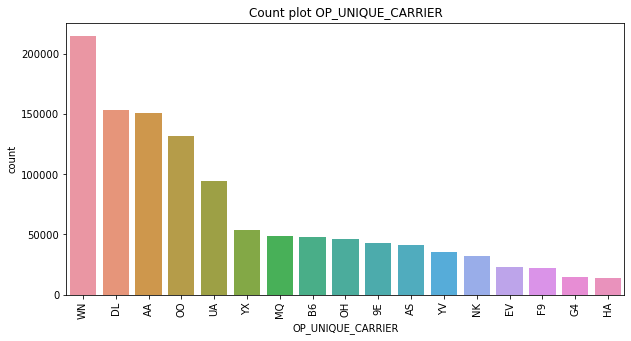

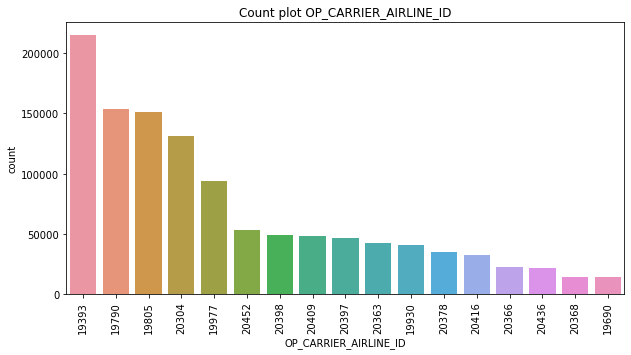

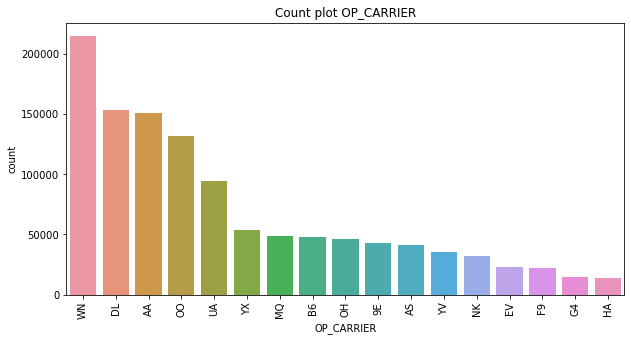

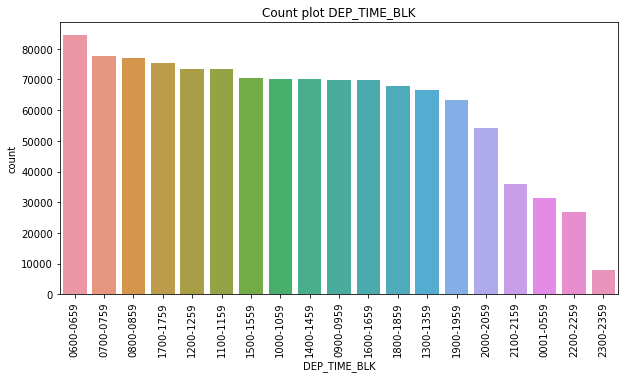

In [28]:
for col in category_col:
    plt.figure(figsize=(10,5))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.xticks(rotation=90)  
    plt.title(f"Count plot {col}")
    plt.show()

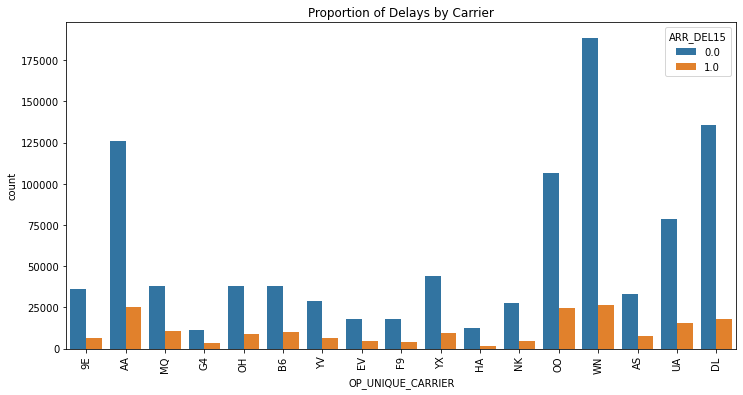

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['OP_UNIQUE_CARRIER'], hue=df['ARR_DEL15'])
plt.xticks(rotation=90)
plt.title("Proportion of Delays by Carrier")
plt.show()

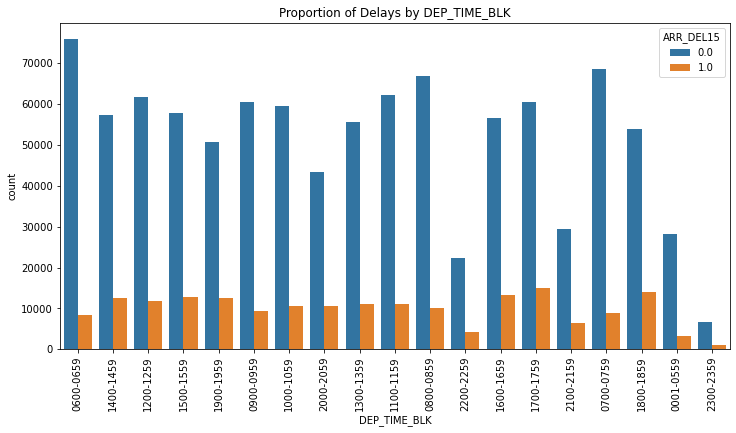

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['DEP_TIME_BLK'], hue=df['ARR_DEL15'])
plt.xticks(rotation=90)
plt.title("Proportion of Delays by DEP_TIME_BLK")
plt.show()

0.0    0.839082
1.0    0.160918
Name: ARR_DEL15, dtype: float64


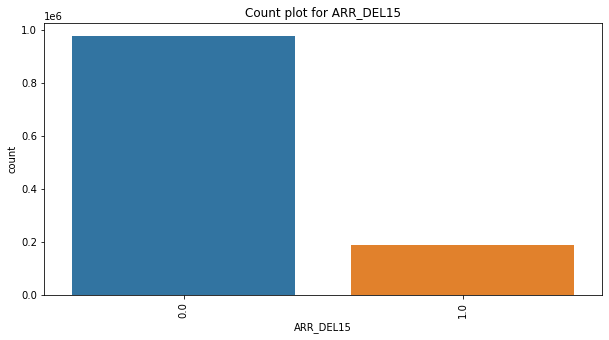

In [31]:
print(df.ARR_DEL15.value_counts(normalize=True))
plt.figure(figsize=(10,5))
sns.countplot(x=df['ARR_DEL15'])
plt.xticks(rotation=90)  
plt.title(f"Count plot for ARR_DEL15")
plt.show()

0.0    0.845737
1.0    0.154263
Name: DEP_DEL15, dtype: float64


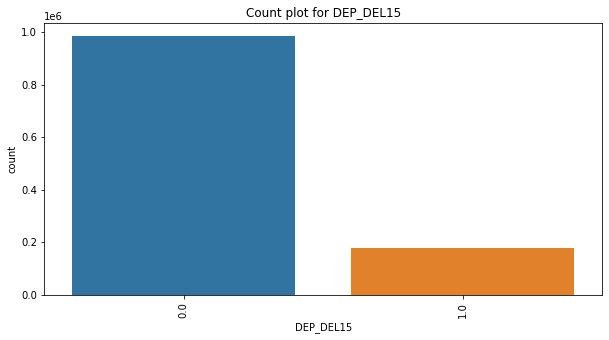

In [32]:
print(df.DEP_DEL15.value_counts(normalize=True))
plt.figure(figsize=(10,5))
sns.countplot(x=df['DEP_DEL15'])
plt.xticks(rotation=90)  
plt.title(f"Count plot for DEP_DEL15")
plt.show()

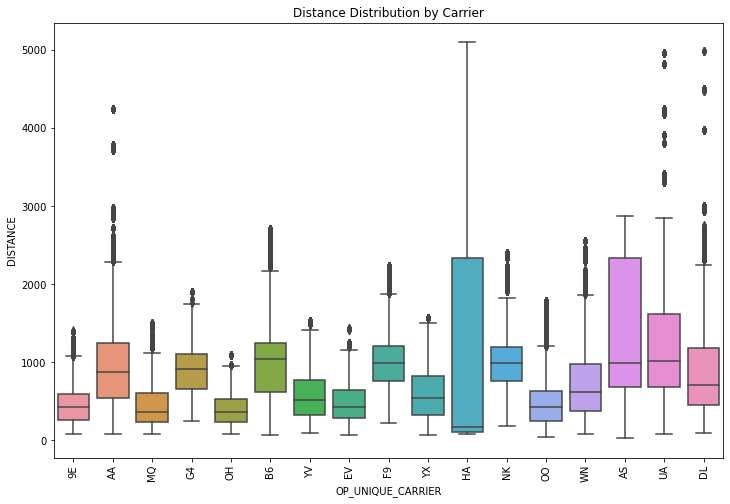

In [33]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['OP_UNIQUE_CARRIER'], y=df['DISTANCE'])
plt.xticks(rotation=90)
plt.title("Distance Distribution by Carrier")
plt.show()

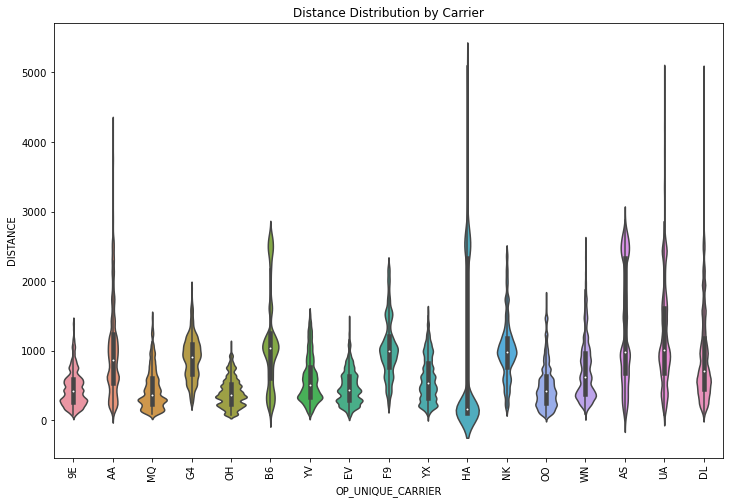

In [34]:
plt.figure(figsize=(12,8))
sns.violinplot(x=df['OP_UNIQUE_CARRIER'], y=df['DISTANCE'])
plt.xticks(rotation=90)
plt.title("Distance Distribution by Carrier")
plt.show()

In [35]:
# Since both 'OP_CARRIER_AIRLINE_ID','OP_CARRIER' are ids we can drop them
df.drop(columns=['OP_CARRIER_AIRLINE_ID','OP_CARRIER'],inplace=True)

In [36]:
df.shape

(1165231, 9)

In [37]:
numerical_col=['DAY_OF_MONTH','DAY_OF_WEEK','Arr_Hour','ARR_DEL15','DISTANCE','Dep_Hour','DEP_DEL15']
category_col=['OP_UNIQUE_CARRIER','DEP_TIME_BLK']

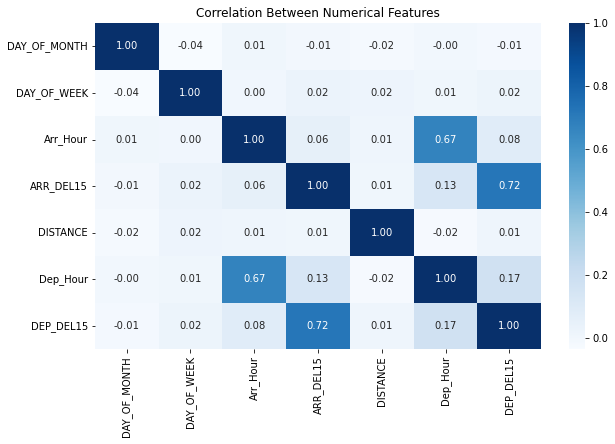

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_col].corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Between Numerical Features")
plt.show()

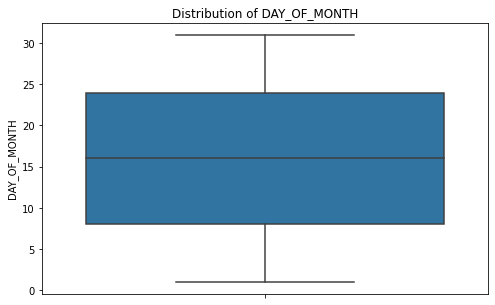

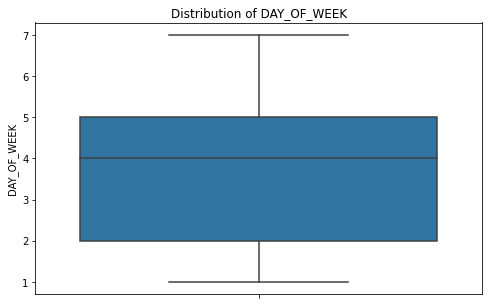

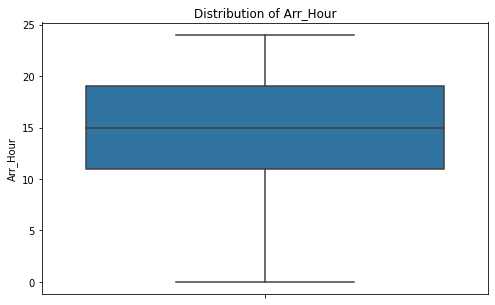

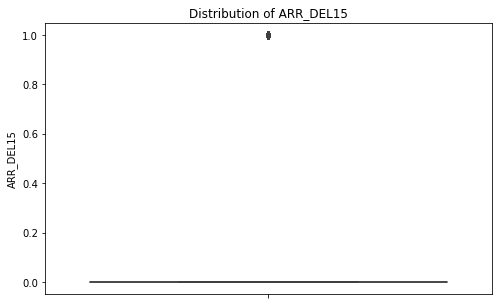

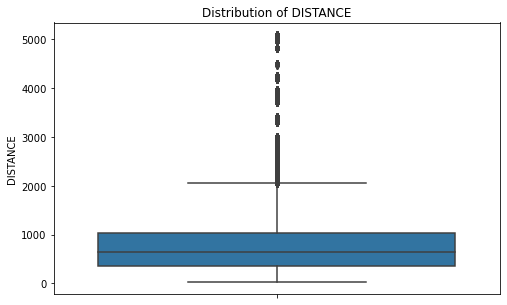

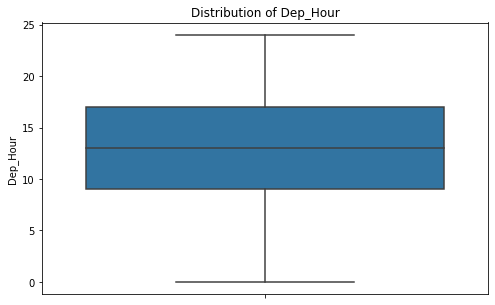

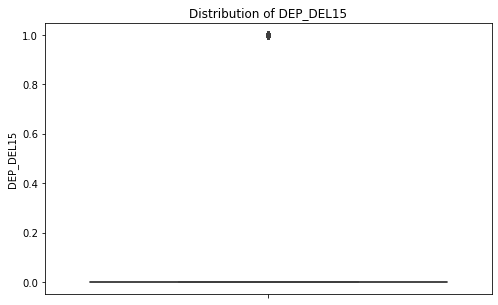

In [43]:
for col in numerical_col:
    plt.figure(figsize=(8,5))
    plt.title(f'Distribution of {col}')
    sns.boxplot(data=df,y=col)
    plt.show()

# Data Preprocessing

In [46]:
std_scaler=StandardScaler()
df[['DAY_OF_MONTH','DAY_OF_WEEK','Arr_Hour','DISTANCE','Dep_Hour']]=std_scaler.fit_transform(df[['DAY_OF_MONTH','DAY_OF_WEEK','Arr_Hour','DISTANCE','Dep_Hour']])
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEP_DEL15,DEP_TIME_BLK,ARR_DEL15,DISTANCE,Dep_Hour,Arr_Hour
0,-1.658172,-0.988439,9E,0.0,0600-0659,0.0,-0.848753,-1.409727,-1.433636
1,-1.658172,-0.988439,9E,0.0,1400-1459,0.0,-0.347298,-0.002266,0.283144
2,-1.658172,-0.988439,9E,0.0,1200-1259,0.0,-0.969034,-0.203332,-0.289116
3,-1.658172,-0.988439,9E,0.0,1500-1559,0.0,-0.979199,0.399866,0.283144
4,-1.658172,-0.988439,9E,0.0,1900-1959,0.0,-0.376098,1.003064,0.855403


In [52]:
df_encoded=pd.get_dummies(df,columns=category_col,drop_first=True)
df_encoded.head()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DEL15,ARR_DEL15,DISTANCE,Dep_Hour,Arr_Hour,OP_UNIQUE_CARRIER_AA,OP_UNIQUE_CARRIER_AS,OP_UNIQUE_CARRIER_B6,...,DEP_TIME_BLK_1400-1459,DEP_TIME_BLK_1500-1559,DEP_TIME_BLK_1600-1659,DEP_TIME_BLK_1700-1759,DEP_TIME_BLK_1800-1859,DEP_TIME_BLK_1900-1959,DEP_TIME_BLK_2000-2059,DEP_TIME_BLK_2100-2159,DEP_TIME_BLK_2200-2259,DEP_TIME_BLK_2300-2359
0,-1.658172,-0.988439,0.0,0.0,-0.848753,-1.409727,-1.433636,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.658172,-0.988439,0.0,0.0,-0.347298,-0.002266,0.283144,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,-1.658172,-0.988439,0.0,0.0,-0.969034,-0.203332,-0.289116,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.658172,-0.988439,0.0,0.0,-0.979199,0.399866,0.283144,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-1.658172,-0.988439,0.0,0.0,-0.376098,1.003064,0.855403,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [54]:
df_encoded.shape

(1165231, 41)

In [61]:
X=df_encoded.drop(columns=['ARR_DEL15'])
y=df_encoded.ARR_DEL15 # Consider Arrival Delay Indicator as Target Variable 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [62]:
x_train.shape

(932184, 40)

In [63]:
x_test.shape

(233047, 40)

In [64]:
y_train.value_counts(normalize=True)

0.0    0.839082
1.0    0.160918
Name: ARR_DEL15, dtype: float64

In [65]:
y_test.value_counts(normalize=True)

0.0    0.83908
1.0    0.16092
Name: ARR_DEL15, dtype: float64

# Building and Training the Model

In [66]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [67]:
y_pred=model.predict(x_test)

In [68]:
y_pred

array([0., 1., 0., ..., 0., 0., 0.])

# Evaluation Metics

In [69]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95    197266
         1.0       0.74      0.77      0.75     35781

    accuracy                           0.92    233047
   macro avg       0.85      0.86      0.85    233047
weighted avg       0.92      0.92      0.92    233047



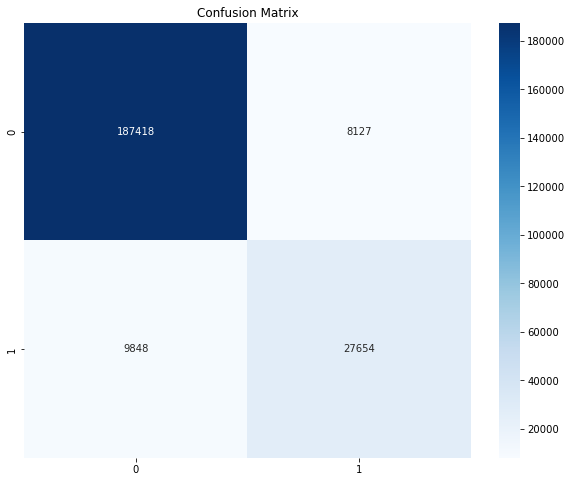

In [75]:
plt.figure(figsize=(10,8))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',annot=True,cmap='Blues')
plt.show()

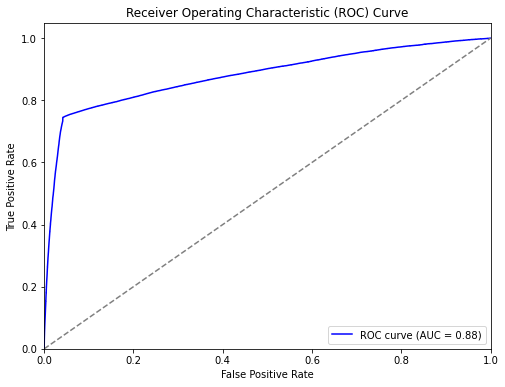

In [77]:
from sklearn.metrics import auc
y_probs = model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Hyperparameter tuning

In [90]:
# Hyperparameters for Logistic Regression
lr_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Hyperparameters for Naive Bayes
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Hyperparameters for Decision Tree
dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [93]:
lr = LogisticRegression(max_iter=1000)
nb = GaussianNB()
dt = DecisionTreeClassifier()

In [95]:
# Logistic Regression
lr_search = GridSearchCV(lr, lr_params, cv=3, n_jobs=-1)
lr_search.fit(x_train, y_train)
lr_best_model = lr_search.best_estimator_
lr_best_score = lr_search.best_score_
lr_best_params = lr_search.best_params_

In [97]:
# Naive Bayes
nb_search = GridSearchCV(nb, nb_params, cv=3, n_jobs=-1)
nb_search.fit(x_train, y_train)
nb_best_model = nb_search.best_estimator_
nb_best_score = nb_search.best_score_
nb_best_params = nb_search.best_params_

In [99]:
# Decision Tree
dt_search = GridSearchCV(dt, dt_params, cv=3, n_jobs=-1)
dt_search.fit(x_train, y_train)
dt_best_model = dt_search.best_estimator_
dt_best_score = dt_search.best_score_
dt_best_params = dt_search.best_params_

In [100]:
# Print the best scores and respective parameters
print(f"Logistic Regression Best Score: {lr_best_score}")
print(f"Logistic Regression Best Parameters: {lr_best_params}")

print(f"Naive Bayes Best Score: {nb_best_score}")
print(f"Naive Bayes Best Parameters: {nb_best_params}")

print(f"Decision Tree Best Score: {dt_best_score}")
print(f"Decision Tree Best Parameters: {dt_best_params}")

Logistic Regression Best Score: 0.9240160740797952
Logistic Regression Best Parameters: {'C': 0.1, 'solver': 'saga'}
Naive Bayes Best Score: 0.8559994593342087
Naive Bayes Best Parameters: {'var_smoothing': 1e-07}
Decision Tree Best Score: 0.9251210061532916
Decision Tree Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [103]:
from sklearn.metrics import accuracy_score
lr_test_score = accuracy_score(y_test, lr_best_model.predict(x_test))
nb_test_score = accuracy_score(y_test, nb_best_model.predict(x_test))
dt_test_score = accuracy_score(y_test, dt_best_model.predict(x_test))

print(f"Logistic Regression Test Score: {lr_test_score}")
print(f"Naive Bayes Test Score: {nb_test_score}")
print(f"Decision Tree Test Score: {dt_test_score}")

Logistic Regression Test Score: 0.9230326929760949
Naive Bayes Test Score: 0.8554368861216836
Decision Tree Test Score: 0.924564572811493


In [104]:
y_pred=dt_best_model.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96    197887
         1.0       0.73      0.78      0.76     35160

    accuracy                           0.92    233047
   macro avg       0.85      0.87      0.86    233047
weighted avg       0.93      0.92      0.93    233047



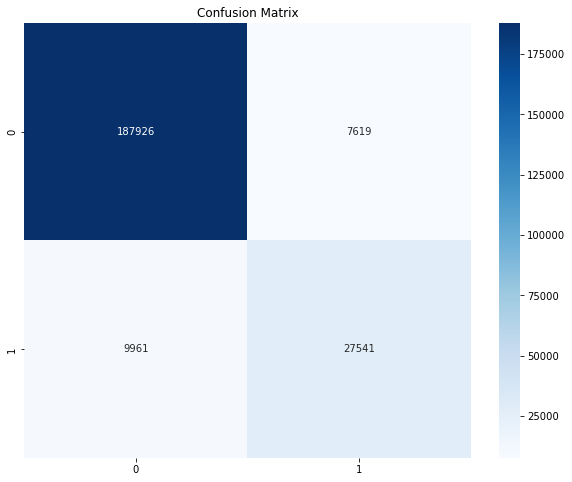

In [105]:
plt.figure(figsize=(10,8))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',annot=True,cmap='Blues')
plt.show()

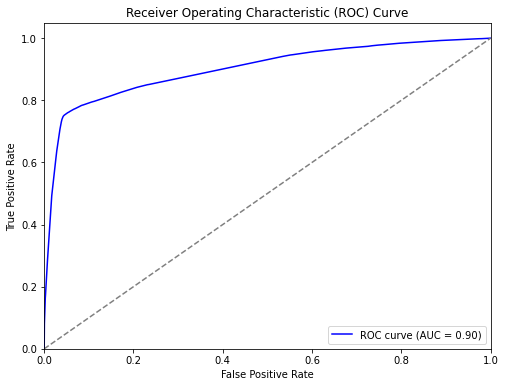

In [107]:
y_probs = dt_best_model.predict_proba(x_test)[:, 1] 
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Decsion Tree performs best on the test data with nearly 93% of accuracy and AUC=0.90 which is better than logistic regression 